# Data preprocessing

In [64]:
import tensorflow as tf
from tensorflow.keras import datasets, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
#Load cifar 100 images
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

In [68]:
#Choose a subset from cifar 100
subset_classes = [10,11,12,13,14,15,16,17]
subset_train_images = train_images[np.isin(train_labels, subset_classes).flatten()]
subset_train_labels = train_labels[np.isin(train_labels, subset_classes).flatten()]
subset_test_images = test_images[np.isin(test_labels, subset_classes).flatten()]
subset_test_labels = test_labels[np.isin(test_labels, subset_classes).flatten()]



In [70]:
#For the code to work the the class indices need to be between values 0 and 7
subset_train_labels = subset_train_labels - subset_train_labels.min()
subset_test_labels = subset_test_labels -subset_test_labels.min()

In [72]:
#Function that shows a sample of images from a set. Also shows the label of the image
def show_images(train_images, train_labels):

    nb_samples = 25
    nb_row = 5
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(train_labels[i][0])

    plt.show()

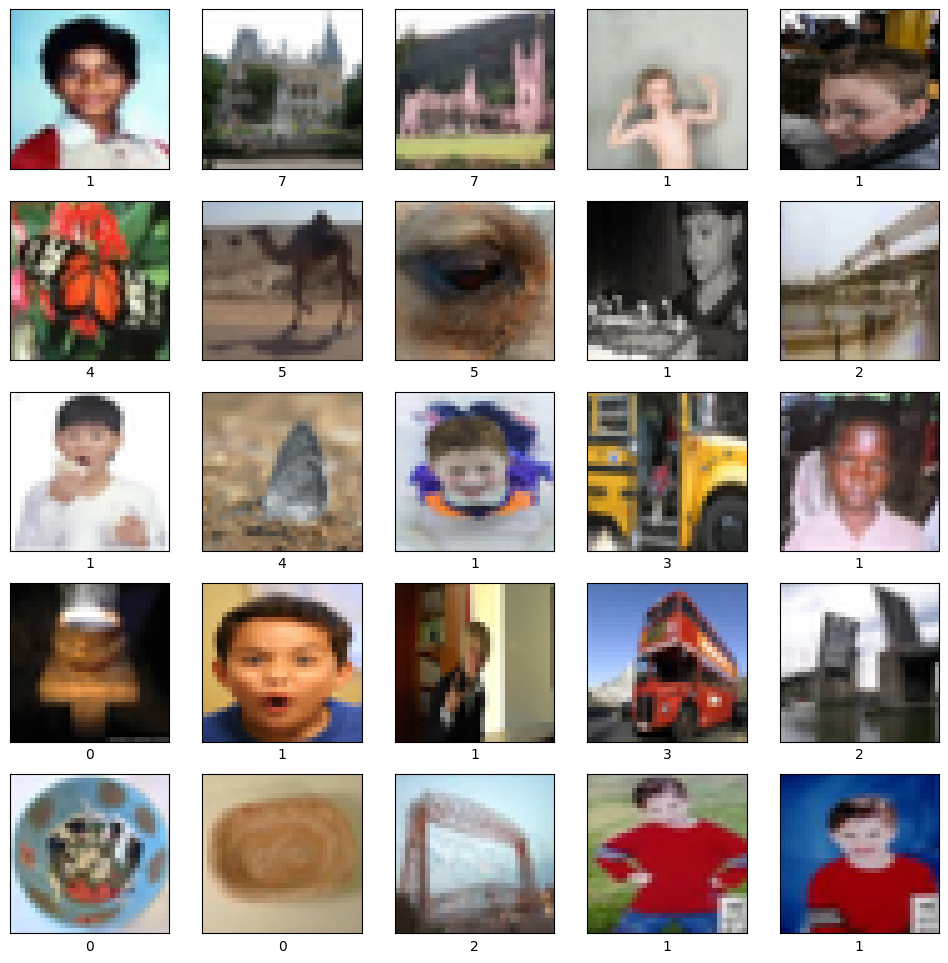

In [74]:
#plot images from the subset to see that they are loeaded correctly with correct labels
show_images(subset_train_images, subset_train_labels)

In [76]:
#data normalization
max_pixel_value = 256

subset_train_images = subset_train_images/max_pixel_value
subset_test_images = subset_test_images/max_pixel_value

In [78]:
#Change train labels to categorical type
subset_train_labels = to_categorical(subset_train_labels, num_classes=8)
subset_test_labels = to_categorical(subset_test_labels, num_classes=8)


# Model training

In [151]:
#First we build a CNN model consisting of several convolution, maxpooling and depth layers
def make_model():
    # Variables
    INPUT_SHAPE = (32, 32, 3)
    FILTER1_SIZE = 64
    FILTER2_SIZE = 256
    FILTER_SHAPE = (3, 3)
    POOL_SHAPE = (2, 2)
    FULLY_CONNECT_NUM = 256
    NUM_CLASSES = 8
    ACTIVATION_CONV = 'relu'
    ACTIVATION_DENSE = 'relu'

    # Model architecture implementation
    model = Sequential()
    model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation=ACTIVATION_CONV, input_shape=INPUT_SHAPE))
    model.add(MaxPooling2D(POOL_SHAPE))
    model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation=ACTIVATION_CONV))
    model.add(MaxPooling2D(POOL_SHAPE))
    model.add(Flatten())
    model.add(Dense(FULLY_CONNECT_NUM, activation=ACTIVATION_DENSE))
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    return model

In [83]:
#Summary of the model to see the output of each layer
model = make_model()
model.summary()

Model: "sequential_2"
┌─────────────────────────────────┬────────────────────────┬───────────────┐
│ Layer (type)                    │ Output Shape           │       Param # │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼───────────────────

In [91]:

BATCH_SIZE = 22
EPOCHS =15

model = make_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Train the model
training_history = model.fit(subset_train_images, subset_train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(subset_test_images, subset_test_labels))


Epoch 1/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.2633 - loss: 1.9011 - val_accuracy: 0.4900 - val_loss: 1.4500
Epoch 2/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.5242 - loss: 1.3328 - val_accuracy: 0.5475 - val_loss: 1.2800
Epoch 3/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.6202 - loss: 1.1030 - val_accuracy: 0.5713 - val_loss: 1.1876
Epoch 4/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.6572 - loss: 0.9854 - val_accuracy: 0.6413 - val_loss: 1.0370
Epoch 5/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7111 - loss: 0.8335 - val_accuracy: 0.6787 - val_loss: 0.9648
Epoch 6/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7739 - loss: 0.6787 - val_accuracy: 0.6812 - val_loss: 0.9548
Epoch 7/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.7966 - loss: 0.6028 - val_accuracy: 0.6950 - val_loss: 0.9654
Epoch 8/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8406 - loss: 0.5004 - va

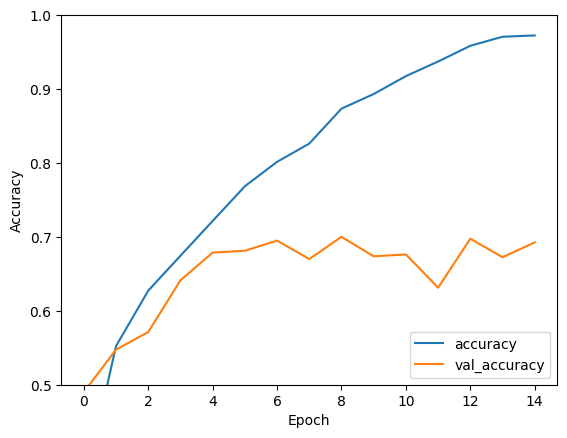

25/25 - 0s - 13ms/step - accuracy: 0.6925 - loss: 1.3689


In [93]:
# Plot accuracy and validation accuracy
plt.plot(training_history.history['accuracy'], label='accuracy')
plt.plot(training_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, *_ = model.evaluate(subset_test_images,  subset_test_labels, verbose=2)

The accuracy of the model is 0.692 which is a good result result. From the above graph we can see that the accuracy graph approaches one When the epoch number increases. When accuracy is significantly higher than the validation accuracy it indicates overfitting. Therefore, from the graph we can see that for this model five epochs gives the most optimal results. This is the epoch size I will use in the upcoming experiments.

**Experiment 1**
- Change inner layer sizes
- See how this changes accuracy.


In [95]:
def make_model_size(filter1_size, filter2_size, fully_connect_num):
    NUM_CLASSES= 8
    INPUT_SHAPE = (32,32,3)
    POOL_SHAPE = (2,2)
    FILTER_SHAPE = (3,3)
    ACTIVATION_CONV = 'relu'
    ACTIVATION_DENSE = 'relu'
    
    model = Sequential()
    model.add(Conv2D(filter1_size, FILTER_SHAPE, activation=ACTIVATION_CONV, input_shape=INPUT_SHAPE))
    model.add(MaxPooling2D(POOL_SHAPE))
    model.add(Conv2D(filter2_size, FILTER_SHAPE, activation=ACTIVATION_CONV))
    model.add(MaxPooling2D(POOL_SHAPE))
    model.add(Flatten())
    model.add(Dense(fully_connect_num, activation=ACTIVATION_DENSE))
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    return model

In [97]:

BATCH_SIZE = 32
EPOCHS =6

#Different filter sizes to test the model
filter1_size = [32, 64]
filter2_size = [64, 128]
fully_connect_num = [64, 128]

#dataframe to store accuracies of the tests
size_df = pd.DataFrame(columns=["accuracy", "conv1_size", "conv2_size", "fully_connect_num"])

for size1 in filter1_size:
    for size2 in filter2_size:
        for c_num in fully_connect_num:
                            
            model = make_model_size(size1, size2, c_num)

            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

            # Train the model
            training_history = model.fit(subset_train_images, subset_train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(subset_test_images, subset_test_labels))


            test_loss, test_acc, *_ = model.evaluate(subset_test_images,  subset_test_labels, verbose=2)

            size_df.loc[len(size_df)] = {"accuracy": test_acc, "conv1_size": size1, "conv2_size": size2, "fully_connect_num": c_num}
                            

Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.2557 - loss: 1.9287 - val_accuracy: 0.4288 - val_loss: 1.5654
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4815 - loss: 1.4204 - val_accuracy: 0.5200 - val_loss: 1.3252
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5909 - loss: 1.1915 - val_accuracy: 0.5638 - val_loss: 1.2466
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6187 - loss: 1.0981 - val_accuracy: 0.5925 - val_loss: 1.1837
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6617 - loss: 0.9711 - val_accuracy: 0.6388 - val_loss: 1.0494
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6859 - loss: 0.8887 - val_accuracy: 0.6187 - val_loss: 1.1123
25/25 - 0s - 6ms/step - accuracy: 0.6187 - loss: 1.1123
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2363 - loss: 1.9434 - val_accuracy: 0.4387 - val_loss: 1.5357
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4910 - loss: 1.4093 - val_accuracy: 0.5275 - val_loss: 1.3127
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5889 - loss: 1.1572 - val_accuracy: 0.6050 - val_loss: 1.1553
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6407 - loss: 1.0359 - val_accuracy: 0.5975 - val_loss: 1.1437
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6894 - loss: 0.9035 - val_accuracy: 0.6300 - val_loss: 1.0419
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7323 - loss: 0.8047 - val_accuracy: 0.6575 - val_loss: 1.0056
25/25 - 0s - 6ms/step - accuracy: 0.6575 - loss: 1.0056


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.2369 - loss: 1.9484 - val_accuracy: 0.4512 - val_loss: 1.4913
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5255 - loss: 1.3487 - val_accuracy: 0.5250 - val_loss: 1.3792
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5893 - loss: 1.1887 - val_accuracy: 0.5863 - val_loss: 1.1771
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6482 - loss: 1.0165 - val_accuracy: 0.6062 - val_loss: 1.1599
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.6892 - loss: 0.8999 - val_accuracy: 0.6263 - val_loss: 1.0993
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7193 - loss: 0.8298 - val_accuracy: 0.6575 - val_loss: 0.9981
25/25 - 0s - 9ms/step - accuracy: 0.6575 - loss: 0.9981


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.2414 - loss: 1.9122 - val_accuracy: 0.4563 - val_loss: 1.5412
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5169 - loss: 1.3571 - val_accuracy: 0.5000 - val_loss: 1.4031
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6019 - loss: 1.1622 - val_accuracy: 0.5675 - val_loss: 1.2424
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6431 - loss: 1.0279 - val_accuracy: 0.6200 - val_loss: 1.0934
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6958 - loss: 0.8868 - val_accuracy: 0.6175 - val_loss: 1.1203
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7244 - loss: 0.8153 - val_accuracy: 0.6700 - val_loss: 0.9965
25/25 - 0s - 11ms/step - accuracy: 0.6700 - loss: 0.9965


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.2463 - loss: 1.9412 - val_accuracy: 0.4538 - val_loss: 1.5089
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.4567 - loss: 1.4511 - val_accuracy: 0.4963 - val_loss: 1.3914
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5506 - loss: 1.2339 - val_accuracy: 0.5612 - val_loss: 1.2541
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6117 - loss: 1.1098 - val_accuracy: 0.5850 - val_loss: 1.1693
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6599 - loss: 0.9954 - val_accuracy: 0.6250 - val_loss: 1.0782
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6927 - loss: 0.9033 - val_accuracy: 0.6550 - val_loss: 1.0260
25/25 - 0s - 11ms/step - accuracy: 0.6550 - loss: 1.0260


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.2151 - loss: 1.9709 - val_accuracy: 0.3650 - val_loss: 1.6299
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.4997 - loss: 1.4023 - val_accuracy: 0.5387 - val_loss: 1.3055
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5794 - loss: 1.1830 - val_accuracy: 0.5625 - val_loss: 1.2286
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6310 - loss: 1.0585 - val_accuracy: 0.6413 - val_loss: 1.0753
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6696 - loss: 0.9292 - val_accuracy: 0.6338 - val_loss: 1.0827
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7120 - loss: 0.8116 - val_accuracy: 0.6300 - val_loss: 1.0726
25/25 - 0s - 9ms/step - accuracy: 0.6300 - loss: 1.0726
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.2228 - loss: 1.9757 - val_accuracy: 0.4475 - val_loss: 1.5181
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.5023 - loss: 1.4125 - val_accuracy: 0.5350 - val_loss: 1.3171
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.5829 - loss: 1.1854 - val_accuracy: 0.6100 - val_loss: 1.1525
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6386 - loss: 1.0257 - val_accuracy: 0.6137 - val_loss: 1.1365
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6864 - loss: 0.9079 - val_accuracy: 0.6538 - val_loss: 1.0479
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7296 - loss: 0.7959 - val_accuracy: 0.6750 - val_loss: 0.9976
25/25 - 0s - 14ms/step - accuracy: 0.6750 - loss: 0.9976


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.2875 - loss: 1.8257 - val_accuracy: 0.4750 - val_loss: 1.4787
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5478 - loss: 1.3051 - val_accuracy: 0.5700 - val_loss: 1.2048
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6147 - loss: 1.0975 - val_accuracy: 0.6125 - val_loss: 1.0789
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.6942 - loss: 0.8887 - val_accuracy: 0.6488 - val_loss: 1.0226
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7557 - loss: 0.7225 - val_accuracy: 0.6725 - val_loss: 0.9753
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7963 - loss: 0.6295 - val_accuracy: 0.6837 - val_loss: 0.9727
25/25 - 0s - 13ms/step - accuracy: 0.6837 - loss: 0.9727


In [99]:
display(size_df)

,accuracy,conv1_size,conv2_size,fully_connect_num
0,0.61875,32,64,64
1,0.65750,32,64,128
2,0.65750,32,128,64
3,0.67000,32,128,128
4,0.65500,64,64,64
5,0.63000,64,64,128
6,0.67500,64,128,64
7,0.68375,64,128,128


We can see that by adding more neurons to each layer the accuracy of the model increases. The best performing model had 64 neurons in convolution 1, 128 in convolution 2 and 128 in the dense layer. By increasing the convolution layer neuron size the accuracy increases the most.

**Experiment 2**
- Change inner layer depths.
- See how the number of convolution layers change the accuracy.

In [101]:
def make_model_depth(filter_shape, pool_shape, layer_num):
    NUM_CLASSES= 8
    INPUT_SHAPE = (32,32,3)

    FILTER1_SIZE = 64
    FILTER2_SIZE = 128
    FULLY_CONNECT_NUM = 128
    ACTIVATION_CONV = 'relu'
    ACTIVATION_DENSE = 'relu'
    
    model = Sequential()
    model.add(Conv2D(FILTER1_SIZE, filter_shape, activation=ACTIVATION_CONV, input_shape=INPUT_SHAPE))
    model.add(MaxPooling2D(pool_shape))
    for num in range(layer_num):
        model.add(Conv2D(FILTER2_SIZE, filter_shape, activation=ACTIVATION_CONV))
        model.add(MaxPooling2D(pool_shape))
    model.add(Flatten())
    model.add(Dense(FULLY_CONNECT_NUM, activation=ACTIVATION_DENSE))
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    return model

In [103]:

BATCH_SIZE = 32
EPOCHS =6

filter_shape = [(1,1),(4,4)]
pool_shape = [(1,1), (3,3)]

depth_df = pd.DataFrame(columns=["accuracy", "filter_shape", "pool_shape","layer_num"])

for f_shape in filter_shape:
    for p_shape in pool_shape:
        for layer_num in range(2):
                            
            model = make_model_depth(f_shape, p_shape,layer_num)

            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

            # Train the model
            training_history = model.fit(subset_train_images, subset_train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(subset_test_images, subset_test_labels))


            test_loss, test_acc, *_ = model.evaluate(subset_test_images,  subset_test_labels, verbose=2)

            depth_df.loc[len(depth_df)] = {"accuracy": test_acc, "filter_shape": f_shape, "pool_shape": p_shape, "layer_num": layer_num}
                            

C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.3137 - loss: 2.7819 - val_accuracy: 0.4812 - val_loss: 1.4469
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.5223 - loss: 1.2947 - val_accuracy: 0.5275 - val_loss: 1.3338
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5791 - loss: 1.1488 - val_accuracy: 0.5450 - val_loss: 1.2819
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.6425 - loss: 1.0407 - val_accuracy: 0.5663 - val_loss: 1.2503
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.6778 - loss: 0.9556 - val_accuracy: 0.5312 - val_loss: 1.4078
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.7089 - loss: 0.8553 - val_accuracy: 0.5987 - val_loss: 1.2061
25/25 - 0s - 14ms/step - accuracy: 0.5987 - loss: 1.2061


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 233ms/step - accuracy: 0.2941 - loss: 2.4309 - val_accuracy: 0.5063 - val_loss: 1.3607
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 232ms/step - accuracy: 0.5497 - loss: 1.2428 - val_accuracy: 0.5462 - val_loss: 1.2506
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 233ms/step - accuracy: 0.6333 - loss: 1.0482 - val_accuracy: 0.5875 - val_loss: 1.1923
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - accuracy: 0.6808 - loss: 0.8941 - val_accuracy: 0.6150 - val_loss: 1.1271
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 228ms/step - accuracy: 0.7459 - loss: 0.7406 - val_accuracy: 0.5700 - val_loss: 1.3067
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 232ms/step - accuracy: 0.7850 - loss: 0.6297 - val_accuracy: 0.6050 - val_loss: 1.2563
25/25 - 1s - 30ms/step - accuracy: 0.6050 - loss: 1.2563


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.2777 - loss: 1.8722 - val_accuracy: 0.4175 - val_loss: 1.5831
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4797 - loss: 1.4194 - val_accuracy: 0.4963 - val_loss: 1.3857
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5383 - loss: 1.2932 - val_accuracy: 0.5300 - val_loss: 1.3180
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5867 - loss: 1.1858 - val_accuracy: 0.5263 - val_loss: 1.2946
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6068 - loss: 1.1095 - val_accuracy: 0.5825 - val_loss: 1.2425
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6284 - loss: 1.0554 - val_accuracy: 0.5900 - val_loss: 1.2082
25/25 - 0s - 14ms/step - accuracy: 0.5900 - loss: 1.2082


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.2135 - loss: 1.9995 - val_accuracy: 0.4075 - val_loss: 1.6626
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3899 - loss: 1.6142 - val_accuracy: 0.4212 - val_loss: 1.5545
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4706 - loss: 1.4518 - val_accuracy: 0.4688 - val_loss: 1.4441
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5003 - loss: 1.3404 - val_accuracy: 0.5138 - val_loss: 1.3506
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5477 - loss: 1.2782 - val_accuracy: 0.5075 - val_loss: 1.3410
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5430 - loss: 1.2432 - val_accuracy: 0.5238 - val_loss: 1.3126
25/25 - 0s - 17ms/step - accuracy: 0.5238 - loss: 1.3126


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 157ms/step - accuracy: 0.2673 - loss: 2.3595 - val_accuracy: 0.5175 - val_loss: 1.3622
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.5932 - loss: 1.2041 - val_accuracy: 0.5800 - val_loss: 1.2377
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.6931 - loss: 0.9091 - val_accuracy: 0.5575 - val_loss: 1.2726
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.7638 - loss: 0.6979 - val_accuracy: 0.6050 - val_loss: 1.2038
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.8390 - loss: 0.5332 - val_accuracy: 0.6200 - val_loss: 1.1915
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.8876 - loss: 0.3749 - val_accuracy: 0.6275 - val_loss: 1.2555
25/25 - 0s - 19ms/step - accuracy: 0.6275 - loss: 1.2555


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 326ms/step - accuracy: 0.3130 - loss: 1.8619 - val_accuracy: 0.5312 - val_loss: 1.3291
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 50s 401ms/step - accuracy: 0.5975 - loss: 1.1612 - val_accuracy: 0.5700 - val_loss: 1.2360
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 481ms/step - accuracy: 0.7019 - loss: 0.8357 - val_accuracy: 0.6037 - val_loss: 1.1078
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 312ms/step - accuracy: 0.8101 - loss: 0.5877 - val_accuracy: 0.6000 - val_loss: 1.2725
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 332ms/step - accuracy: 0.8796 - loss: 0.3441 - val_accuracy: 0.6100 - val_loss: 1.2694
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 337ms/step - accuracy: 0.9456 - loss: 0.1700 - val_accuracy: 0.6300 - val_loss: 1.5218
25/25 - 2s - 78ms/step - accuracy: 0.6300 - loss: 1.5218
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2657 - loss: 1.8955 - val_accuracy: 0.4550 - val_loss: 1.4600
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5301 - loss: 1.3224 - val_accuracy: 0.5337 - val_loss: 1.2920
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6228 - loss: 1.1119 - val_accuracy: 0.6087 - val_loss: 1.1498
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6656 - loss: 0.9831 - val_accuracy: 0.6225 - val_loss: 1.1124
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6935 - loss: 0.9082 - val_accuracy: 0.6500 - val_loss: 1.0395
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7342 - loss: 0.8189 - val_accuracy: 0.6050 - val_loss: 1.1485
25/25 - 0s - 8ms/step - accuracy: 0.6050 - loss: 1.1485


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.2329 - loss: 1.9709 - val_accuracy: 0.3988 - val_loss: 1.5878
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4616 - loss: 1.5098 - val_accuracy: 0.4275 - val_loss: 1.5300
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5222 - loss: 1.3012 - val_accuracy: 0.5587 - val_loss: 1.2443
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6212 - loss: 1.0960 - val_accuracy: 0.5975 - val_loss: 1.1600
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6680 - loss: 0.9703 - val_accuracy: 0.5888 - val_loss: 1.1325
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7041 - loss: 0.8526 - val_accuracy: 0.6037 - val_loss: 1.1671
25/25 - 0s - 10ms/step - accuracy: 0.6037 - loss: 1.1671


In [105]:
display(depth_df)

,accuracy,filter_shape,pool_shape,layer_num
0,0.59875,"(1, 1)","(1, 1)",0
1,0.60500,"(1, 1)","(1, 1)",1
2,0.59000,"(1, 1)","(3, 3)",0
3,0.52375,"(1, 1)","(3, 3)",1
4,0.62750,"(4, 4)","(1, 1)",0
5,0.63000,"(4, 4)","(1, 1)",1
6,0.60500,"(4, 4)","(3, 3)",0
7,0.60375,"(4, 4)","(3, 3)",1


Looking at the accuracy at different shapes and inner layer depths, we can see that in general the accuracy increases when the inner layers are increased and the shapes of the layers are bigger but in some cases when one of these is increased the accuracy is worse. The best results seem to be achieved when all of the parameters are increased simultaneously. In this case the accuracy is the highest when filter shape is (4,4) pool_shape is (3,3) and layer depth is the largest I experimented with.

**Experiment 3**
- Change activation algorithms for second convolution layer and first dense layer
- Also change layer sizes to see how different activation algorithms change with respect to the layer size

In [107]:
def make_model_activation(activation_conv, activation_dense, filter2_size, fully_connect_num):
    NUM_CLASSES= 8
    INPUT_SHAPE = (32,32,3)
    POOL_SHAPE = (2,2)
    FILTER_SHAPE = (3,3)
    
    FILTER1_SIZE = 64
    ACTIVATION_CONV = 'relu'
    ACTIVATION_DENSE = 'relu'
    
    model = Sequential()
    model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation=ACTIVATION_CONV, input_shape=INPUT_SHAPE))
    model.add(MaxPooling2D(POOL_SHAPE))
    model.add(Conv2D(filter2_size, FILTER_SHAPE, activation=activation_conv))
    model.add(MaxPooling2D(POOL_SHAPE))
    model.add(Flatten())
    model.add(Dense(fully_connect_num, activation=activation_dense))
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    return model

In [109]:

BATCH_SIZE = 32
EPOCHS =6

activation_conv = ['relu', 'softmax']
activation_dense = ['relu','sigmoid']
filter2_size = [64, 256]
fully_connect_num = [128,256]

activation_df = pd.DataFrame(columns=["accuracy", "activation_conv", "activation_dense", "filter2_size", "fully_connect_num"])

for a_conv in activation_conv:
    for a_dense in activation_dense:
        for filter2 in filter2_size:
            for c_num in fully_connect_num:
                            
                model = make_model_activation(a_conv, a_dense, filter2, c_num)

                model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

                # Train the model
                training_history = model.fit(subset_train_images, subset_train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(subset_test_images, subset_test_labels))


                test_loss, test_acc, *_ = model.evaluate(subset_test_images,  subset_test_labels, verbose=2)

                activation_df.loc[len(activation_df)] = {"accuracy": test_acc, "activation_conv": a_conv, "activation_dense": a_dense, "filter2_size": filter2, "fully_connect_num": c_num}

Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.2257 - loss: 1.9323 - val_accuracy: 0.4437 - val_loss: 1.5502
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4984 - loss: 1.4143 - val_accuracy: 0.4988 - val_loss: 1.3682
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.5692 - loss: 1.2181 - val_accuracy: 0.5725 - val_loss: 1.2159
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6275 - loss: 1.0747 - val_accuracy: 0.5763 - val_loss: 1.1900
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6734 - loss: 0.9486 - val_accuracy: 0.6313 - val_loss: 1.0492
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.6952 - loss: 0.8705 - val_accuracy: 0.6037 - val_loss: 1.1473
25/25 - 0s - 8ms/step - accuracy: 0.6037 - loss: 1.1473
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.2702 - loss: 1.8843 - val_accuracy: 0.4575 - val_loss: 1.4895
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5226 - loss: 1.3264 - val_accuracy: 0.5625 - val_loss: 1.2539
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6189 - loss: 1.0949 - val_accuracy: 0.6225 - val_loss: 1.0974
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.6700 - loss: 0.9455 - val_accuracy: 0.6475 - val_loss: 1.0470
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7140 - loss: 0.8214 - val_accuracy: 0.6775 - val_loss: 0.9666
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7461 - loss: 0.7215 - val_accuracy: 0.6612 - val_loss: 1.0166
25/25 - 0s - 10ms/step - accuracy: 0.6612 - loss: 1.0166


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.2421 - loss: 1.9278 - val_accuracy: 0.4162 - val_loss: 1.6457
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.5165 - loss: 1.3577 - val_accuracy: 0.5763 - val_loss: 1.2064
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.6064 - loss: 1.0945 - val_accuracy: 0.6175 - val_loss: 1.1093
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.6718 - loss: 0.9434 - val_accuracy: 0.6025 - val_loss: 1.1649
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.7120 - loss: 0.8311 - val_accuracy: 0.6525 - val_loss: 1.0514
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.7376 - loss: 0.7440 - val_accuracy: 0.6587 - val_loss: 1.0000
25/25 - 1s - 25ms/step - accuracy: 0.6587 - loss: 1.0000


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.2835 - loss: 1.8489 - val_accuracy: 0.4863 - val_loss: 1.4199
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.5456 - loss: 1.2876 - val_accuracy: 0.6050 - val_loss: 1.1723
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.6233 - loss: 1.0793 - val_accuracy: 0.6237 - val_loss: 1.0632
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.6831 - loss: 0.8752 - val_accuracy: 0.6762 - val_loss: 0.9718
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.7513 - loss: 0.7252 - val_accuracy: 0.6513 - val_loss: 1.0021
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.7972 - loss: 0.6074 - val_accuracy: 0.7088 - val_loss: 0.8944
25/25 - 0s - 19ms/step - accuracy: 0.7088 - loss: 0.8944
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2559 - loss: 1.9053 - val_accuracy: 0.4487 - val_loss: 1.5193
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4980 - loss: 1.3978 - val_accuracy: 0.5562 - val_loss: 1.2911
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5748 - loss: 1.2035 - val_accuracy: 0.5650 - val_loss: 1.1987
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6262 - loss: 1.0715 - val_accuracy: 0.6037 - val_loss: 1.1017
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6694 - loss: 0.9449 - val_accuracy: 0.6388 - val_loss: 1.0179
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.7040 - loss: 0.8512 - val_accuracy: 0.6463 - val_loss: 0.9909
25/25 - 0s - 11ms/step - accuracy: 0.6463 - loss: 0.9909


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.2607 - loss: 1.9170 - val_accuracy: 0.4288 - val_loss: 1.5176
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5052 - loss: 1.3488 - val_accuracy: 0.4787 - val_loss: 1.4177
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5848 - loss: 1.1672 - val_accuracy: 0.5587 - val_loss: 1.2029
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.6264 - loss: 1.0335 - val_accuracy: 0.5975 - val_loss: 1.1297
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6667 - loss: 0.9441 - val_accuracy: 0.6500 - val_loss: 1.0239
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7083 - loss: 0.8554 - val_accuracy: 0.6737 - val_loss: 0.9968
25/25 - 0s - 9ms/step - accuracy: 0.6737 - loss: 0.9968
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.2299 - loss: 1.9736 - val_accuracy: 0.4875 - val_loss: 1.4512
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.5084 - loss: 1.3546 - val_accuracy: 0.5537 - val_loss: 1.2504
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.6211 - loss: 1.0894 - val_accuracy: 0.5625 - val_loss: 1.1669
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.6651 - loss: 0.9662 - val_accuracy: 0.6012 - val_loss: 1.1164
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.7125 - loss: 0.8636 - val_accuracy: 0.6800 - val_loss: 0.9828
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.7646 - loss: 0.7073 - val_accuracy: 0.7025 - val_loss: 0.8981
25/25 - 0s - 18ms/step - accuracy: 0.7025 - loss: 0.8981
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.2748 - loss: 1.8785 - val_accuracy: 0.5138 - val_loss: 1.3910
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.5366 - loss: 1.2853 - val_accuracy: 0.6125 - val_loss: 1.1586
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.6321 - loss: 1.0488 - val_accuracy: 0.6350 - val_loss: 1.0706
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.6831 - loss: 0.9083 - val_accuracy: 0.5975 - val_loss: 1.1338
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.7234 - loss: 0.8024 - val_accuracy: 0.6762 - val_loss: 0.9501
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.7850 - loss: 0.6456 - val_accuracy: 0.6950 - val_loss: 0.8922
25/25 - 1s - 25ms/step - accuracy: 0.6950 - loss: 0.8922


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.1486 - loss: 2.0682 - val_accuracy: 0.3100 - val_loss: 1.8359
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.3430 - loss: 1.7630 - val_accuracy: 0.3787 - val_loss: 1.6545
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4251 - loss: 1.5362 - val_accuracy: 0.4538 - val_loss: 1.4681
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5172 - loss: 1.3440 - val_accuracy: 0.5100 - val_loss: 1.3703
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5588 - loss: 1.2311 - val_accuracy: 0.5325 - val_loss: 1.2977
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5945 - loss: 1.1693 - val_accuracy: 0.5113 - val_loss: 1.3422
25/25 - 0s - 9ms/step - accuracy: 0.5113 - loss: 1.3422
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.1449 - loss: 2.0725 - val_accuracy: 0.2675 - val_loss: 1.8519
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3308 - loss: 1.7733 - val_accuracy: 0.3688 - val_loss: 1.6399
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4258 - loss: 1.5426 - val_accuracy: 0.4275 - val_loss: 1.5239
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4939 - loss: 1.3957 - val_accuracy: 0.4888 - val_loss: 1.4281
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5591 - loss: 1.2460 - val_accuracy: 0.5412 - val_loss: 1.2882
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5954 - loss: 1.1292 - val_accuracy: 0.5562 - val_loss: 1.2598
25/25 - 0s - 11ms/step - accuracy: 0.5562 - loss: 1.2598
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.1324 - loss: 2.0739 - val_accuracy: 0.3063 - val_loss: 1.8821
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.3056 - loss: 1.8204 - val_accuracy: 0.3750 - val_loss: 1.6574
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.4217 - loss: 1.5797 - val_accuracy: 0.4325 - val_loss: 1.5306
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.4694 - loss: 1.4215 - val_accuracy: 0.5000 - val_loss: 1.3678
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.5302 - loss: 1.2854 - val_accuracy: 0.5462 - val_loss: 1.2713
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.5990 - loss: 1.1339 - val_accuracy: 0.5763 - val_loss: 1.2232
25/25 - 1s - 23ms/step - accuracy: 0.5763 - loss: 1.2232


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.1400 - loss: 2.0808 - val_accuracy: 0.2463 - val_loss: 1.9388
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.3086 - loss: 1.8218 - val_accuracy: 0.3600 - val_loss: 1.7162
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.3578 - loss: 1.6558 - val_accuracy: 0.4275 - val_loss: 1.5803
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.4563 - loss: 1.4738 - val_accuracy: 0.4975 - val_loss: 1.3971
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.5409 - loss: 1.2739 - val_accuracy: 0.5050 - val_loss: 1.3978
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.5908 - loss: 1.1627 - val_accuracy: 0.5587 - val_loss: 1.2314
25/25 - 1s - 20ms/step - accuracy: 0.5587 - loss: 1.2314
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.1722 - loss: 2.0856 - val_accuracy: 0.3038 - val_loss: 1.8372
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.3204 - loss: 1.7965 - val_accuracy: 0.3825 - val_loss: 1.6674
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.4251 - loss: 1.5820 - val_accuracy: 0.4638 - val_loss: 1.5303
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.4778 - loss: 1.4617 - val_accuracy: 0.4888 - val_loss: 1.4125
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.5265 - loss: 1.3130 - val_accuracy: 0.5288 - val_loss: 1.3517
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5683 - loss: 1.2424 - val_accuracy: 0.5362 - val_loss: 1.2989
25/25 - 0s - 10ms/step - accuracy: 0.5362 - loss: 1.2989
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.1358 - loss: 2.0855 - val_accuracy: 0.3275 - val_loss: 1.8443
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3229 - loss: 1.7813 - val_accuracy: 0.3575 - val_loss: 1.6745
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4085 - loss: 1.5761 - val_accuracy: 0.4487 - val_loss: 1.5312
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4789 - loss: 1.4382 - val_accuracy: 0.4425 - val_loss: 1.5084
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5241 - loss: 1.3297 - val_accuracy: 0.5263 - val_loss: 1.3505
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5506 - loss: 1.2530 - val_accuracy: 0.5450 - val_loss: 1.2798
25/25 - 0s - 9ms/step - accuracy: 0.5450 - loss: 1.2798
Epoch 1/6


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.1606 - loss: 2.0563 - val_accuracy: 0.3275 - val_loss: 1.7978
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.3332 - loss: 1.7395 - val_accuracy: 0.4187 - val_loss: 1.6196
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.4322 - loss: 1.5347 - val_accuracy: 0.4412 - val_loss: 1.5033
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.4736 - loss: 1.4151 - val_accuracy: 0.4900 - val_loss: 1.4291
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.5426 - loss: 1.2703 - val_accuracy: 0.5375 - val_loss: 1.2988
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.6045 - loss: 1.1294 - val_accuracy: 0.5512 - val_loss: 1.2734
25/25 - 1s - 23ms/step - accuracy: 0.5512 - loss: 1.2734


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.1504 - loss: 2.0811 - val_accuracy: 0.3413 - val_loss: 1.8106
Epoch 2/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.3595 - loss: 1.7420 - val_accuracy: 0.4212 - val_loss: 1.5993
Epoch 3/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.4275 - loss: 1.5396 - val_accuracy: 0.4263 - val_loss: 1.5729
Epoch 4/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.4849 - loss: 1.4073 - val_accuracy: 0.5063 - val_loss: 1.3850
Epoch 5/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.5344 - loss: 1.3109 - val_accuracy: 0.5337 - val_loss: 1.3314
Epoch 6/6
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.5744 - loss: 1.2018 - val_accuracy: 0.5550 - val_loss: 1.2540
25/25 - 1s - 24ms/step - accuracy: 0.5550 - loss: 1.2540


In [111]:
display(activation_df)

,accuracy,activation_conv,activation_dense,filter2_size,fully_connect_num
0,0.60375,relu,relu,64,128
1,0.66125,relu,relu,64,256
2,0.65875,relu,relu,256,128
3,0.70875,relu,relu,256,256
4,0.64625,relu,sigmoid,64,128
5,0.67375,relu,sigmoid,64,256
6,0.70250,relu,sigmoid,256,128
7,0.69500,relu,sigmoid,256,256
8,0.51125,softmax,relu,64,128
9,0.55625,softmax,relu,64,256


I changed the second convolution activation algorithms and first dense activation algorithms. The second filter size is 64 and dense layer size is 128 In case where both are relu algorithms the accuracy is the best. Interestingly sigmoid performs better when it is in dense layer and softmax performs better when it is in convoltuion layer.

In [ ]:
print(test_acc)

**Experiment 4**
- Change optimizers to see how they differ
- Change batch sizes and learning rates to see how to they differ

In [153]:
#Test differen batch sizes, optimizers and learning rates
BATCH_SIZE = 100
EPOCHS = 10

model_eb = make_model()

model_eb.compile(optimizer='nadam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Train the model
training_history_eb = model_eb.fit(subset_train_images, subset_train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(subset_test_images, subset_test_labels))


C:\Users\OMISTAJA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step - accuracy: 0.2560 - loss: 1.9290 - val_accuracy: 0.4875 - val_loss: 1.3903
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - accuracy: 0.5512 - loss: 1.2636 - val_accuracy: 0.5763 - val_loss: 1.2044
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - accuracy: 0.6632 - loss: 0.9933 - val_accuracy: 0.6587 - val_loss: 0.9998
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 300ms/step - accuracy: 0.7345 - loss: 0.7850 - val_accuracy: 0.6800 - val_loss: 0.9733
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 311ms/step - accuracy: 0.7573 - loss: 0.6950 - val_accuracy: 0.6938 - val_loss: 0.8864
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 281ms/step - accuracy: 0.8052 - loss: 0.5979 - val_accuracy: 0.7063 - val_loss: 0.8792
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.8366 - loss: 0.4886 - val_accuracy: 0.7138 - val_loss: 0.8827
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 296ms/step - accuracy: 0.8671 - loss: 0.4093 - val_accu

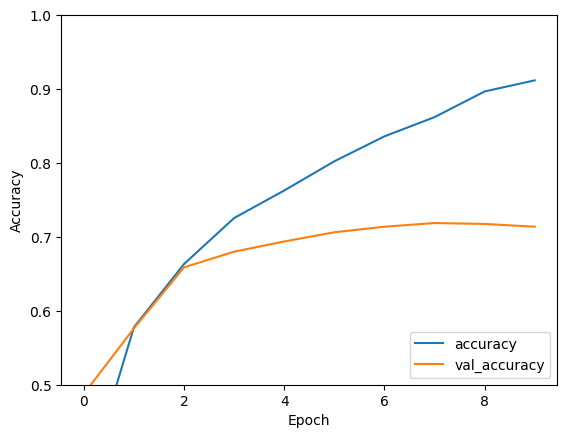

25/25 - 1s - 40ms/step - accuracy: 0.7138 - loss: 0.8997


In [155]:
# Plot accuracy and validation accuracy
plt.plot(training_history_eb.history['accuracy'], label='accuracy')
plt.plot(training_history_eb.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, *_ = model_eb.evaluate(subset_test_images,  subset_test_labels, verbose=2)